# 1.2. Why use Pydantic?

In this notebook, we'll explore the benefits and use cases of Pydantic through practical examples. We'll cover API development, configuration management, data parsing and cleaning, and database ORM integration.

Let's start by installing the required packages:

## Benefits

1. **Type Safety**: Pydantic leverages Python's type hinting system to provide runtime type checking, helping catch type-related errors early in the development process.

2. **Automatic Validation**: Data is automatically validated against the defined schema, reducing the need for manual checks and simplifying error handling.

3. **Clear and Concise Code**: Pydantic models are easy to read and understand, improving code maintainability and reducing the likelihood of bugs.

4. **Serialization and Deserialization**: Easily convert between Pydantic models and various data formats like JSON, dictionaries, and more.

5. **IDE Support**: Since Pydantic uses standard Python type hints, it works well with IDEs, providing better autocomplete and type checking features.

6. **Extensibility**: Pydantic allows for custom validators and data types, making it adaptable to various use cases.

7. **Documentation**: Pydantic models can serve as self-documenting schemas, which is particularly useful in API development.

## Use Cases

Pydantic excels in various scenarios, including:

1. **API Development**: Validate incoming request data and structure response data.


In [1]:
%pip -q install fastapi
%pip -q install pydantic-settings
%pip -q install pytest
%pip -q install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastapi import FastAPI
from fastapi.testclient import TestClient
from pydantic import BaseModel

app = FastAPI()

class Item(BaseModel):
    """
    Represents an item in our inventory.
    
    Attributes:
        name (str): The name of the item.
        price (float): The price of the item.
        is_offer (bool): Indicates if the item is currently on offer. Defaults to False.
    """
    name: str
    price: float
    is_offer: bool = False
    
@app.post("/items/")
async def create_item(item: Item):
    """
    Creates a new item in the inventory.
    
    Args:
        item (Item): The item to be created, validated by Pydantic.
    
    Returns:
        dict: A dictionary containing the name and price of the created item.
    """
    return {"item_name": item.name, "item_price": item.price}
    

In [3]:
# Test the API using FastAPI's TestClient
client = TestClient(app)

response = client.post("/items/", json={"name": "Apple", "price": 0.5})
print(response.json())

{'item_name': 'Apple', 'item_price': 0.5}


## 2. Configuration Management Example

Pydantic can be used to manage application settings, loading them from environment variables or default values.

In [4]:
from pydantic_settings import BaseSettings

class Settings(BaseSettings):
    """
    Application settings loaded from environment variables.
    
    Attributes:
        database_url (str): The URL for the database connection.
        api_key (str): The API key for authentication.
        debug_mode (bool): Indicates if the application is running in debug mode. Defaults to False.
    """
    database_url: str = "sqlite:///./test.db"
    api_key: str = "default_key"
    debug_mode: bool = False

settings = Settings()
print(f"Database URL: {settings.database_url}")
print(f"API Key: {settings.api_key}")
print(f"Debug Mode: {settings.debug_mode}")

Database URL: sqlite:///./test.db
API Key: default_key
Debug Mode: False


## 3. Data Parsing and Cleaning Example

Pydantic excels at parsing and validating complex data structures, including email validation and date parsing.

In [5]:
%pip install -q pydantic[email]

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pydantic import EmailStr, Field
from datetime import date

class User(BaseModel):
    """
    Represents a user in our system.
    
    Attributes:
        name (str): The user's name, between 2 and 50 characters.
        email (EmailStr): The user's email address, validated for correct format.
        birth_date (date): The user's date of birth.
        age (int): The user's age, between 0 and 120.
    """
    name: str = Field(..., min_length=2, max_length=50)
    email: EmailStr
    birth_date: date
    age: int = Field(..., ge=0, le=120)
    
user_data = {
    "name": "Alice",
    "email": "alice@example.com",
    "birth_date": "1990-01-01",
    "age": 32
}

user = User(**user_data)

print(user)

name='Alice' email='alice@example.com' birth_date=datetime.date(1990, 1, 1) age=32


## 4. Database ORM Integration Example

Pydantic can be integrated with SQLAlchemy ORM to provide a clean separation between database models and API models.

### Pydantic-SQLAlchemy ORM Integration Diagram

This diagram illustrates the integration of Pydantic with SQLAlchemy ORM, demonstrating the separation between database models and API models.

![Untitled diagram-2024-09-03-030129.png](<attachment:Untitled diagram-2024-09-03-030129.png>)

### Key Components

1. **Database**: Represents the SQLite in-memory database.
2. **SQLAlchemy (Database Models)**: Shows the ORM components for database interaction.
3. **Pydantic (API Models)**: Displays the model used for API input/output.
4. **Process**: Outlines the main steps in data flow.

### Key Points

- Clear separation between database models (SQLAlchemy) and API models (Pydantic).
- Data transfer between SQLAlchemy and Pydantic models, enabled by `from_attributes = True`.
- Workflow: Create data in DB → Convert to Pydantic model → Use in API.
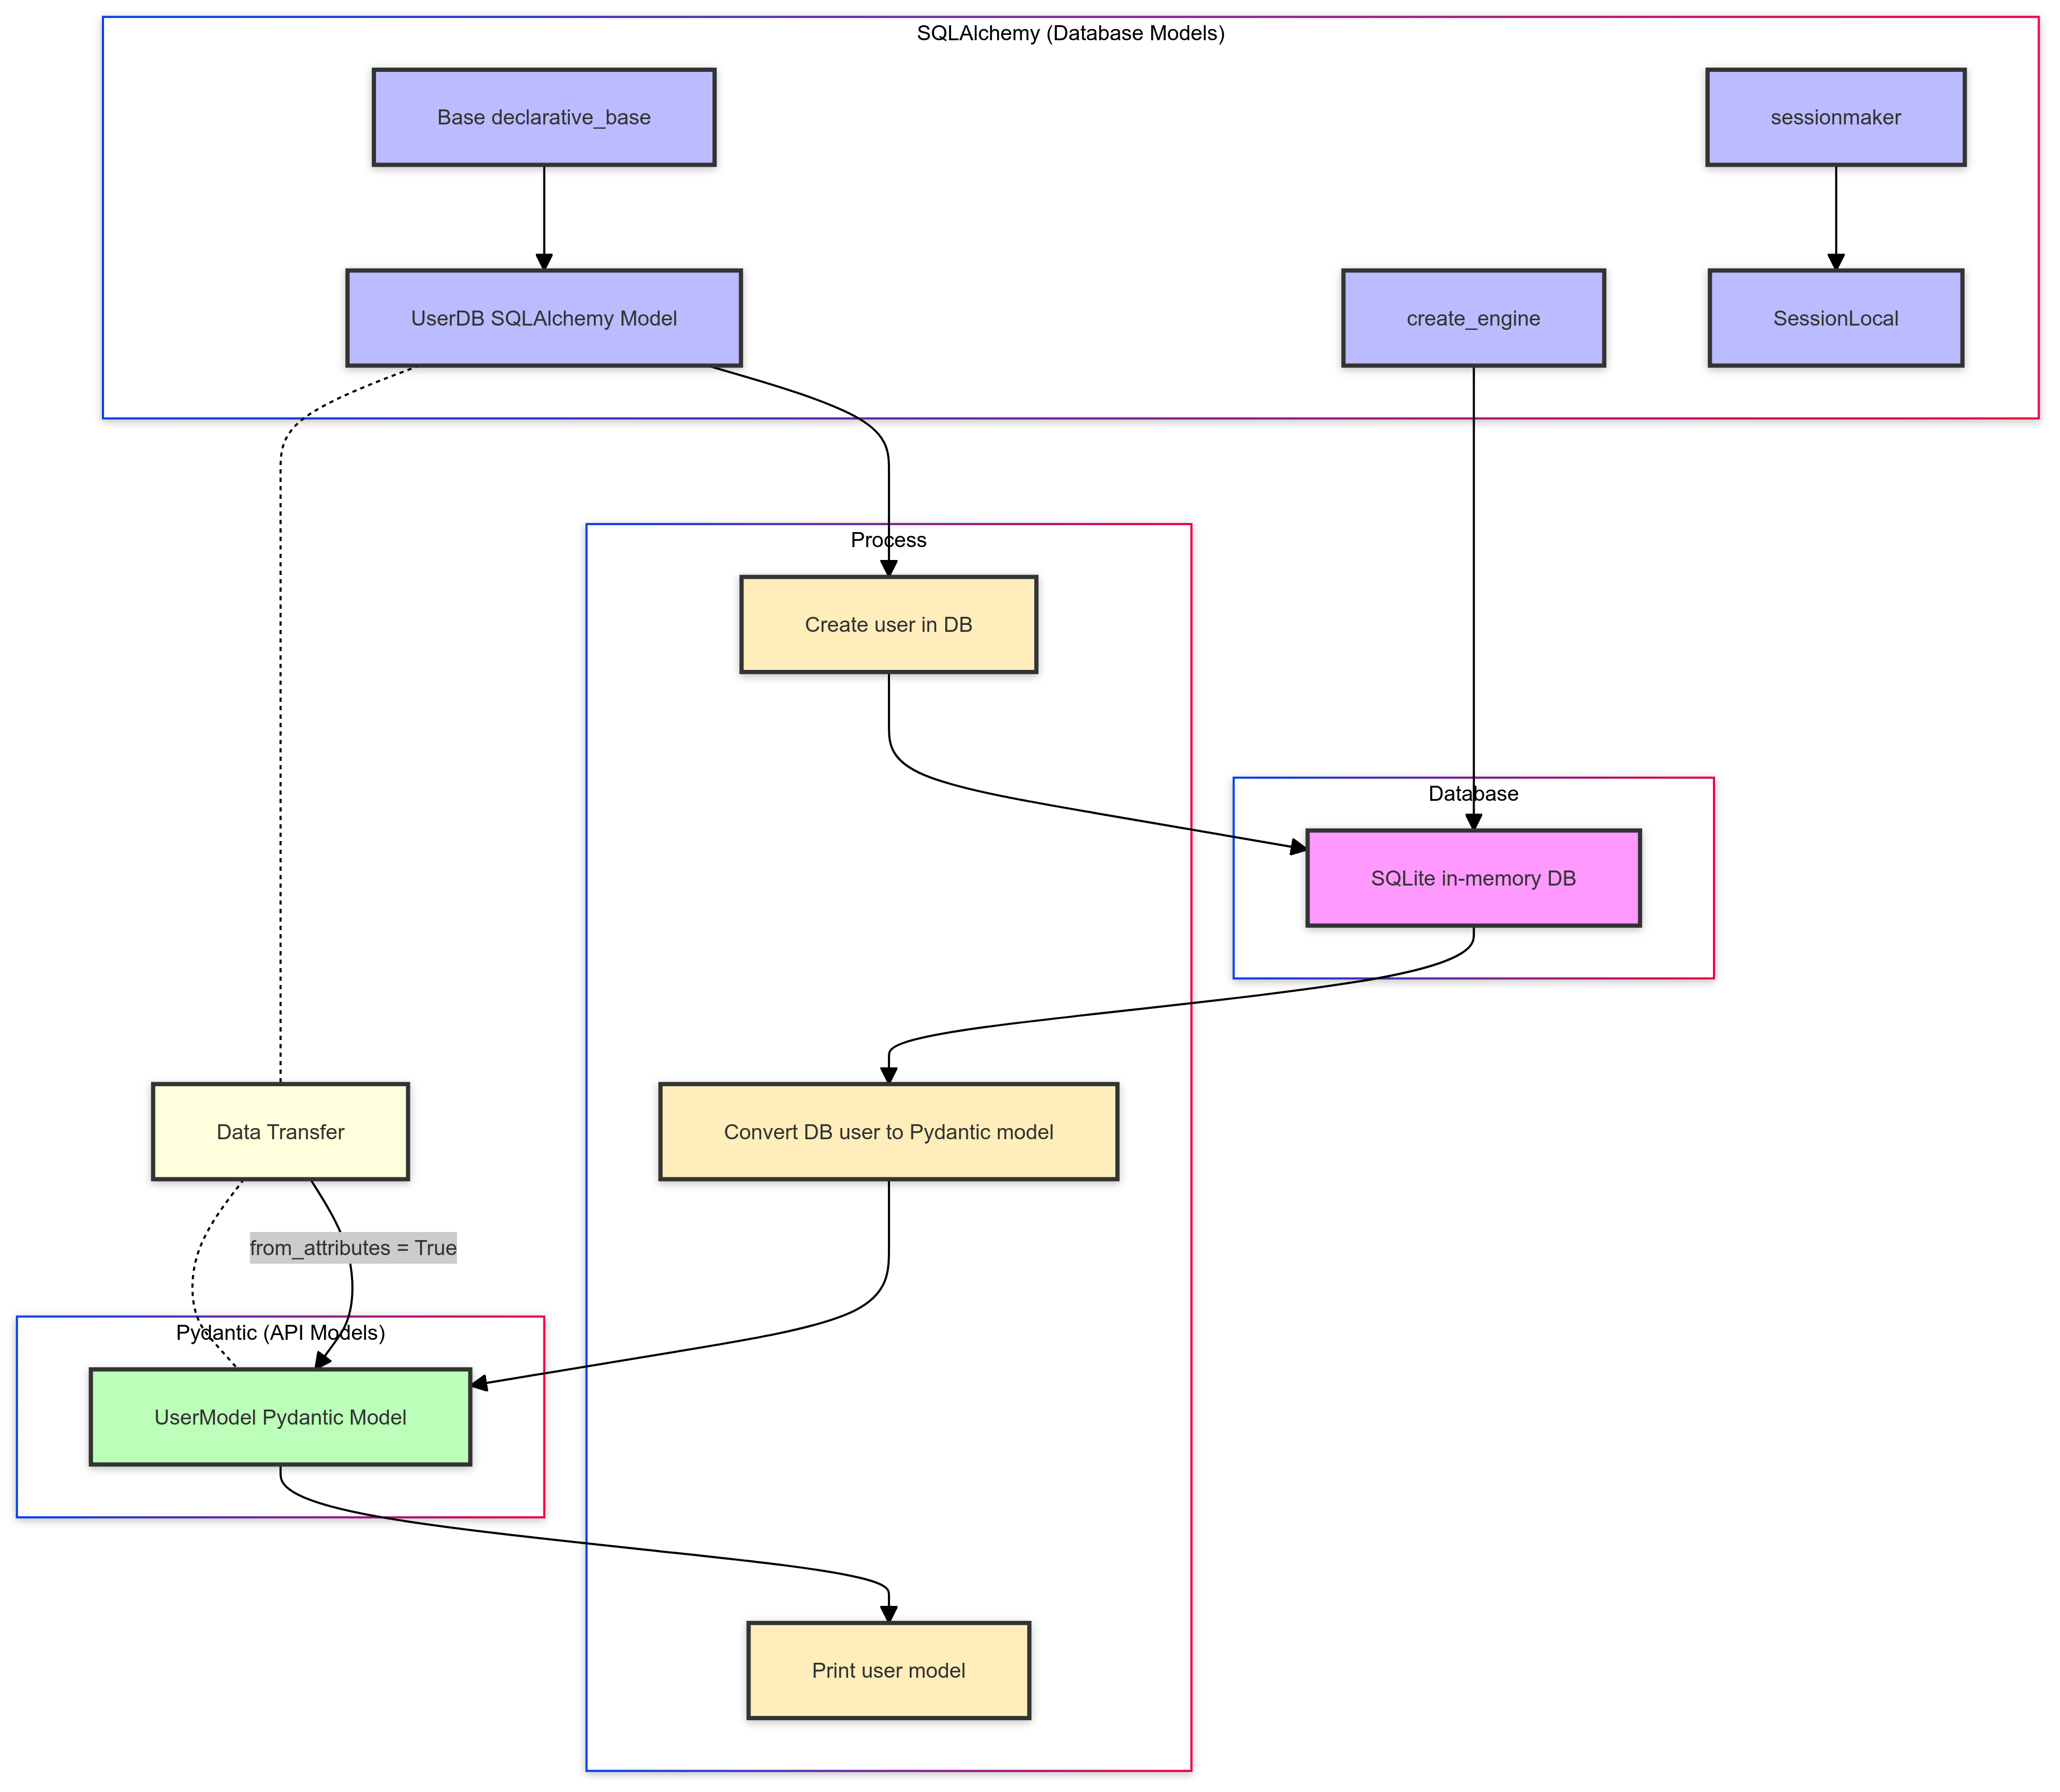

In [7]:
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import declarative_base, sessionmaker
from pydantic import BaseModel

Base = declarative_base()

class UserDB(Base):
    """
    SQLAlchemy model representing the 'users' table in the database.
    """
    __tablename__ = "users"
    id = Column(Integer, primary_key=True, index=True)
    name = Column(String, index=True)
    email = Column(String, unique=True, index=True)

class UserModel(BaseModel):
    """
    Pydantic model for user data, used for API input/output.
    
    Attributes:
        id (int): The user's unique identifier.
        name (str): The user's name.
        email (str): The user's email address.
    """
    id: int
    name: str
    email: str

    class Config:
        from_attributes = True  # Enable attribute-based model population

# Set up the database
engine = create_engine("sqlite:///:memory:")
Base.metadata.create_all(engine)
SessionLocal = sessionmaker(bind=engine)
db = SessionLocal()

# Create a user in the database
db_user = UserDB(name="John Doe", email="john@example.com")
db.add(db_user)
db.commit()
db.refresh(db_user)

# Convert the database user to a Pydantic model using model_validate()
user_model = UserModel.model_validate(db_user)
print(user_model)

# Clean up
db.close()


id=1 name='John Doe' email='john@example.com'


### What Makes Pydantic Valuable

1. **Data Integrity**: Pydantic's type validation and data parsing help prevent errors that might otherwise go unnoticed with manual validation. This is particularly valuable in larger, more complex applications where data consistency is critical.

2. **Readability and Maintainability**: Pydantic models clearly define data structures, making the code more readable and easier to maintain. As applications grow, the consistency and clarity provided by Pydantic's schema definitions can significantly reduce bugs and maintenance costs.

3. **Integration with FastAPI and Other Tools**: Pydantic is tightly integrated with FastAPI, providing seamless request validation and automatic documentation generation. This is a major productivity boost in API development.

4. **Error Handling**: Pydantic automatically generates detailed error messages, which are crucial for debugging and improving data quality. Manual validation would require significant effort to achieve the same level of error detail and handling.